# Loading libraries and Data

In [51]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv')

# Exploratory Data Analysis (EDA)

In [47]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [44]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [45]:
df.isnull().sum()

Monthly beer production    0
dtype: int64

In [46]:
df.shape

(476, 1)

In [6]:
df.Month = pd.to_datetime(df.Month)

In [7]:
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


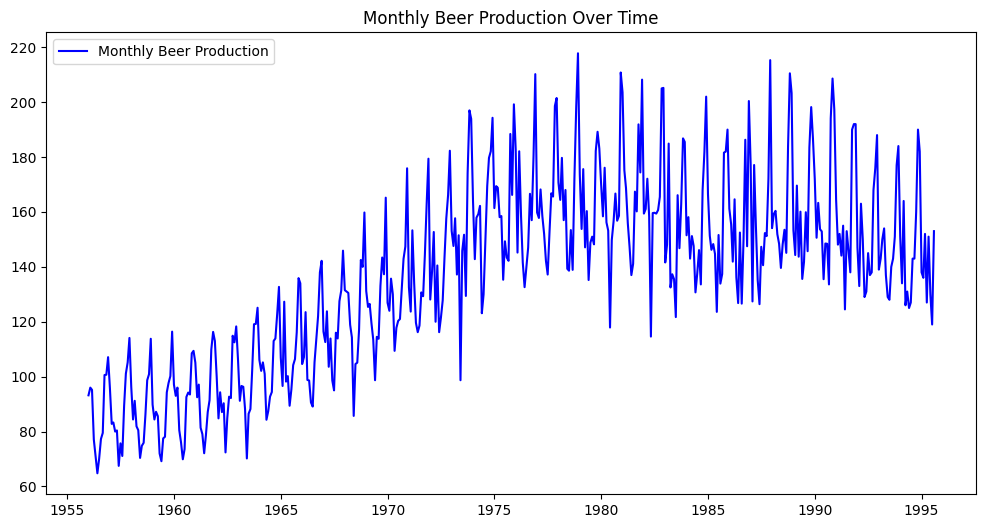

In [50]:
# Monthly Beer Production Over Time

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly beer production'], color='blue', label='Monthly Beer Production')
plt.title('Monthly Beer Production Over Time')
plt.legend()
plt.show()


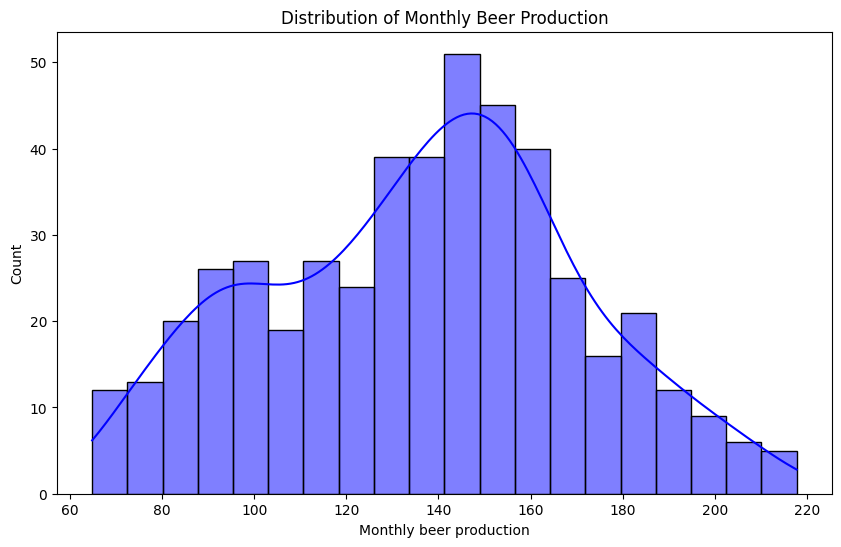

In [53]:
# Distribution of Monthly Beer Production
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly beer production'], kde=True, bins=20, color='blue')
plt.title('Distribution of Monthly Beer Production')
plt.show()

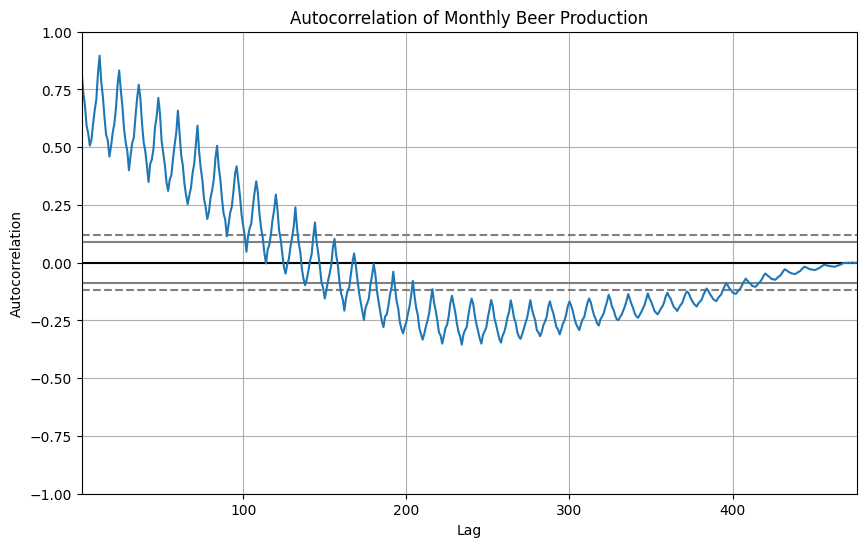

In [54]:
# Autocorrelation of Monthly Beer Production
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Monthly beer production'])
plt.title('Autocorrelation of Monthly Beer Production')
plt.show()

In [8]:
df.index.freq = 'MS'

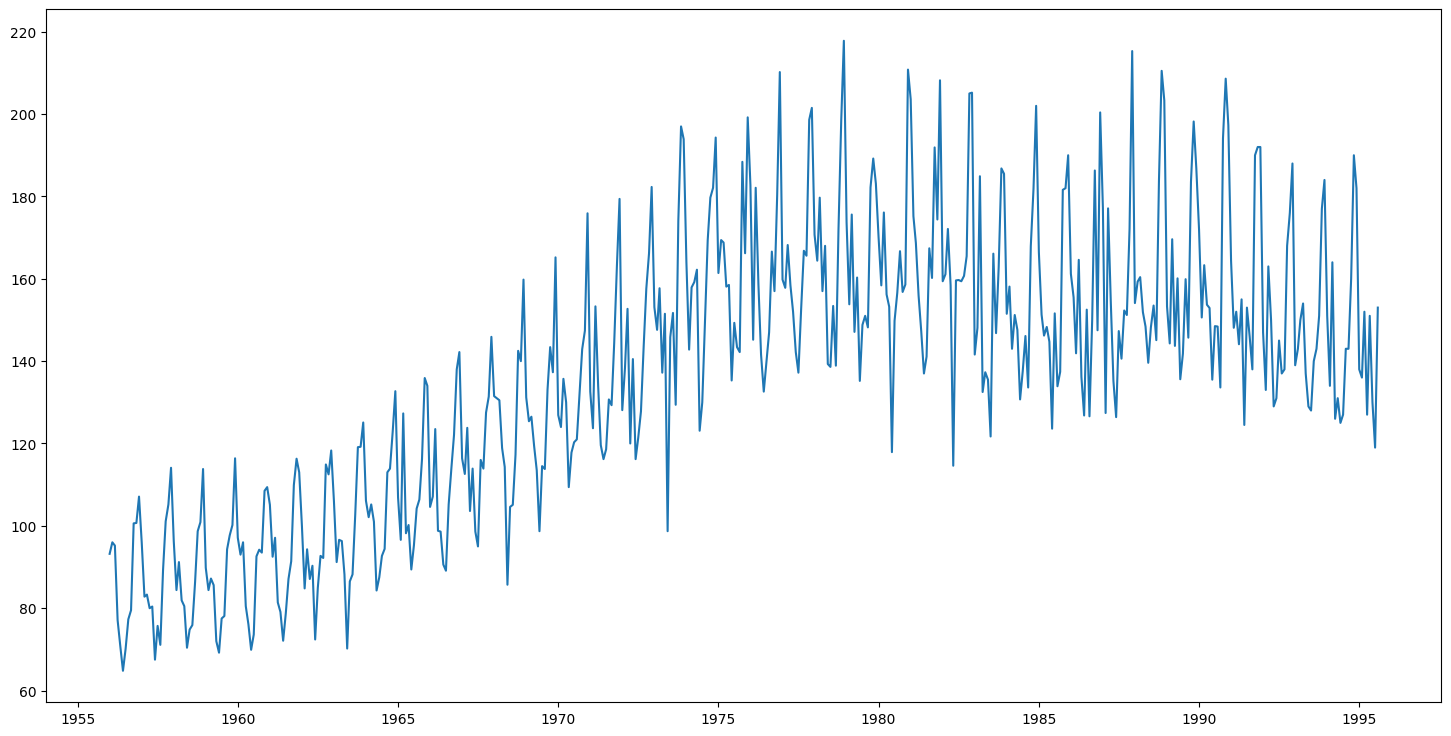

In [9]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

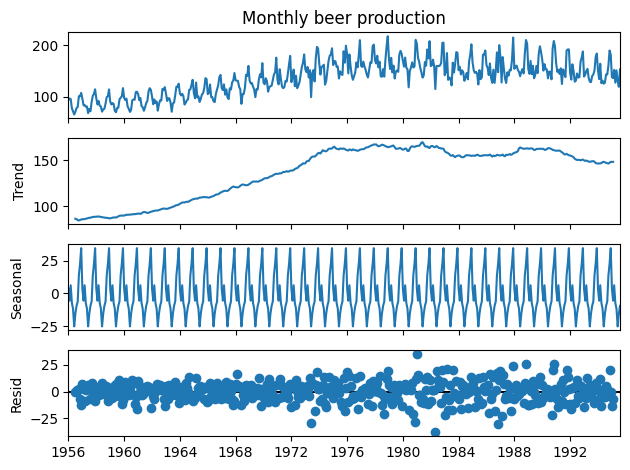

In [10]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

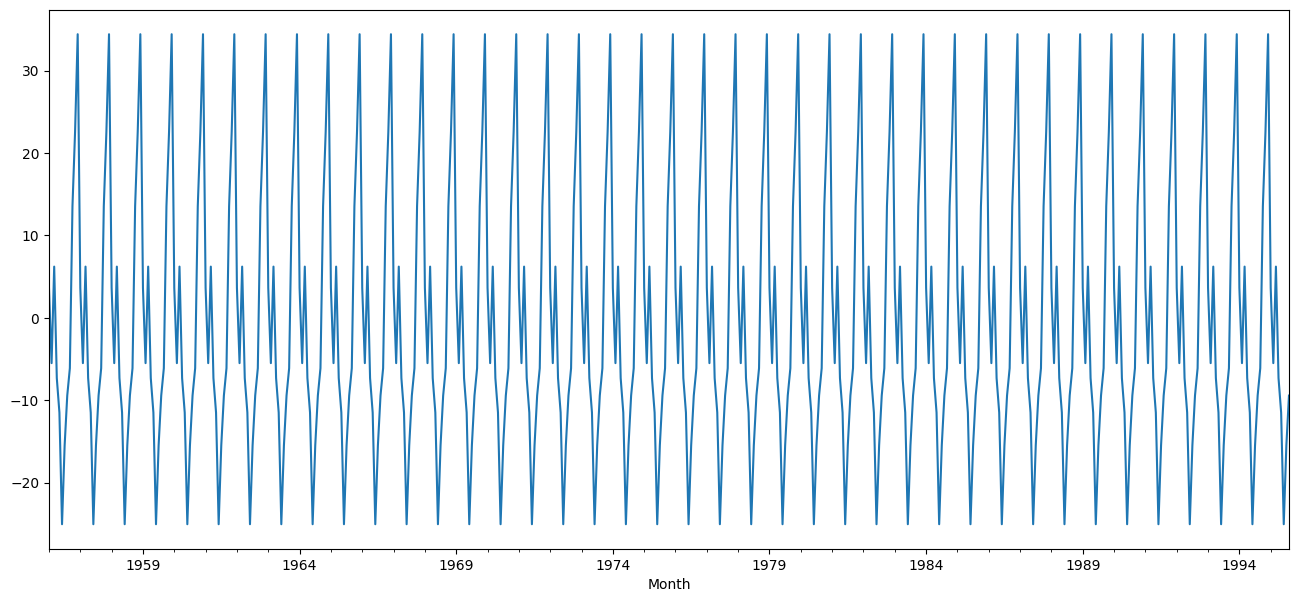

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# ARIMA

In [23]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [14]:
arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.25899D-02

At iterate   15    f=  3.75368D+00    |proj g|=  5.38394D-02

At iterate   20    f=  3.71375D+00    |proj g|=  1.12977D-02

At iterate   25    f=  3.71142D+00    |proj g|=  1.78701D-02

At iterate   30    f=  3.70713D+00    |proj g|=  9.42096D-02

At iterate   35    f=  3.69106D+00    |proj g|=  1.03010D-01

At iterate   40    f=  3.68387D+00    |proj g|=  1.38271D-01

At iterate   45    f=  3.68148D+00    |proj g|=  7.25862D-03

At iterate   50    f=  3.68122D+00    |proj g|=  4.53605D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1708.085
Date:                                    Sat, 28 Sep 2024   AIC                           3438.170
Time:                                            10:56:10   BIC                           3483.685
Sample:                                        01-01-1956   HQIC                          3456.088
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.039     -3.010      0.003      -0.193      -0.041
ar.L2         -0.1681      0.046     -3.672      0.000      -0.258      -0.078
ma.L1         -0.8488      0.026    -32.156      0.000      -0.901      -0.797
ar.S.L12       1.7622      0.089     19.777      0.000       1.588       1.937
ar.S.L24      -1.6191      0.163     -9.952      0.000      -1.938      -1.300
ar.S.L36       0.7930      0.119      6.677      0.000       0.560       1.026
ar.S.L48       0.0627      0.040      1.580      0.114      -0.015       0.140
ma.S.L12      -1.5610      0.109    -14.328      0.000      -1.774      -1.347
ma.S.L24       1.3923      0.177      7.850      0.000       1.045       1.740
ma.S.L36      -0.6570      0.103     -6.389      0.000      -0.859      -0.455
sigma2        83.7927      4.879     17.176      0.000      74.231      93.354
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                41.16
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               4.09   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    134.083363
1994-10-01    157.827905
1994-11-01    181.928478
1994-12-01    183.602677
1995-01-01    144.978013
1995-02-01    136.890822
1995-03-01    151.281201
1995-04-01    133.118484
1995-05-01    137.933250
1995-06-01    120.641296
1995-07-01    128.471587
1995-08-01    138.915458
Freq: MS, Name: ARIMA Predictions, dtype: float64

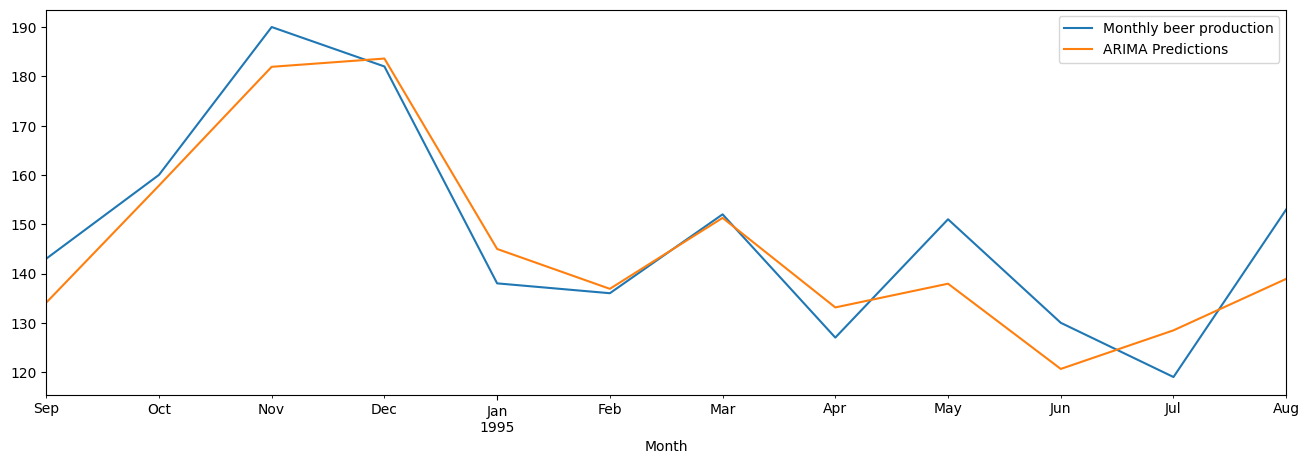

In [16]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

# LSTM

In [22]:
test_data.head()

,Monthly beer production,ARIMA_Predictions
Month,,
1994-09-01,143.0,134.083363
1994-10-01,160.0,157.827905
1994-11-01,190.0,181.928478
1994-12-01,182.0,183.602677
1995-01-01,138.0,144.978013


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
lstm_model.fit(generator,epochs=30)

Epoch 1/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0627
Epoch 2/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0149
Epoch 3/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0101
Epoch 4/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0098
Epoch 5/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0111
Epoch 6/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0068
Epoch 7/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0080
Epoch 8/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0055
Epoch 9/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0072
Epoch 10/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0067
Epoch 11/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0071
Epoch 12/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0069
Epoch 13/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0065
Epoch 14/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0068
Epoch 15/30
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - lo

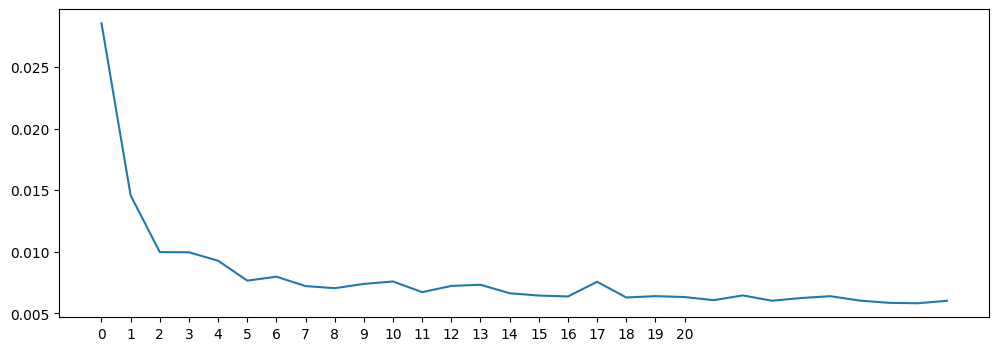

In [31]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [32]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [33]:
lstm_predictions_scaled

[array([0.5694394], dtype=float32),
 array([0.66914177], dtype=float32),
 array([0.806142], dtype=float32),
 array([0.8048637], dtype=float32),
 array([0.6149559], dtype=float32),
 array([0.5871804], dtype=float32),
 array([0.6495918], dtype=float32),
 array([0.51131237], dtype=float32),
 array([0.5129581], dtype=float32),
 array([0.49136326], dtype=float32),
 array([0.50680745], dtype=float32),
 array([0.56772923], dtype=float32)]

In [34]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [35]:
lstm_predictions

array([[151.92422991],
       [167.17869072],
       [188.1397218 ],
       [187.94414477],
       [158.88825302],
       [154.63859754],
       [164.18754594],
       [143.03079193],
       [143.28259073],
       [139.97857835],
       [142.34153931],
       [151.66257291]])

In [37]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data['ARIMA_Predictions'] = arima_pred
test_data.head()

,Monthly beer production,LSTM_Predictions,ARIMA_Predictions
Month,,,
1994-09-01,143.0,151.924230,134.083363
1994-10-01,160.0,167.178691,157.827905
1994-11-01,190.0,188.139722,181.928478
1994-12-01,182.0,187.944145,183.602677
1995-01-01,138.0,158.888253,144.978013


<Axes: xlabel='Month'>

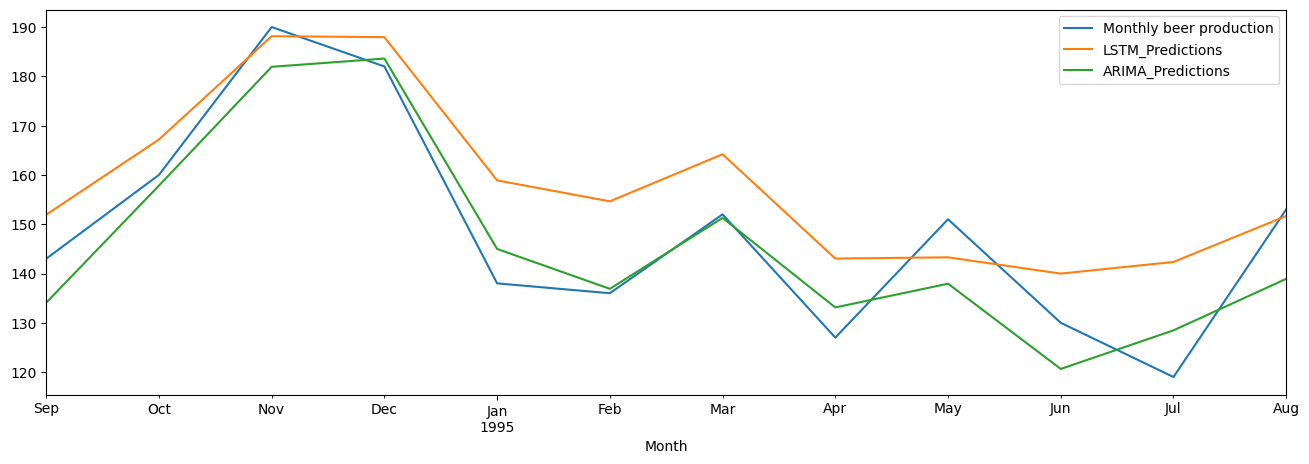

In [40]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True)
test_data['ARIMA_Predictions'].plot(legend = True)

In [43]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# LSTM results
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()
lstm_mape = mean_absolute_percentage_error(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_r2 = r2_score(test_data['Monthly beer production'], test_data["LSTM_Predictions"])

print(f"LSTM Model Evaluation:\nMSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}\nMAPE: {lstm_mape * 100:.2f}%\nR²: {lstm_r2:.4f}")

# ARIMA results
arima_rmse_error = rmse(test_data['Monthly beer production'], test_data["ARIMA_Predictions"])
arima_mse_error = arima_rmse_error**2
arima_mape = mean_absolute_percentage_error(test_data['Monthly beer production'], test_data["ARIMA_Predictions"])
arima_r2 = r2_score(test_data['Monthly beer production'], test_data["ARIMA_Predictions"])
print(f"\nARIMA Model Evaluation:\nMSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMAPE: {arima_mape * 100:.2f}%\nR²: {arima_r2:.4f}")


LSTM Model Evaluation:
MSE Error: 172.07954754265083
RMSE Error: 13.117909419669386
Mean: 136.3953781512605
MAPE: 8.14%
R²: 0.5859

ARIMA Model Evaluation:
MSE Error: 65.48264887815861
RMSE Error: 8.092135001231666
MAPE: 4.73%
R²: 0.8424


# Conclusion:
From the evaluation metrics:

- The ARIMA model shows lower MSE and RMSE values, indicating a better fit with less error.

- The ARIMA model's MAPE is lower (4.73%) compared to LSTM (8.14%), suggesting more accurate percentage-based predictions.

- R² for ARIMA (0.8424) is higher than R² for LSTM (0.5859), meaning ARIMA explains more variance in the data.

Based on these results, the ARIMA model is the more appropriate choice for this particular dataset, as it outperforms LSTM in all the key metrics.